<a href="https://colab.research.google.com/github/AdhavanHero/ML_Domain_Activity/blob/main/Sentimental_Analysis_ML/Sentimental_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import io
from google.colab import files
uploaded = files.upload()


Saving Twitter Sentiments.csv to Twitter Sentiments.csv


In [136]:
#libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #used as regular expressions to find a paticular patter and proceess it
import string#used for string manipulation
import nltk#nlp took kit
import warnings 
warnings.filterwarnings('ignore')

In [70]:

data = pd.read_csv('Twitter Sentiments.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [71]:
data.shape


(31962, 3)

In [72]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [73]:
#removing pattern Function
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for word in r:
    input_text = re.sub(word,"",input_text)
  return input_text

In [79]:
#remove twitter handles/usernames(@user)

data['clean_tweet']=np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")

In [80]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [81]:
#removing special characters and punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [82]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [85]:
#remove short words
data['clean_tweet'] = data['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))###

In [83]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [86]:
# individual words consider as tokens

tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [87]:
# stem the words converted the words into simpler version
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [88]:
#combining wordss into single sentence
for i in range (len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])
  
data['clean_tweet'] = tokenized_tweet
data.head()  

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [21]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


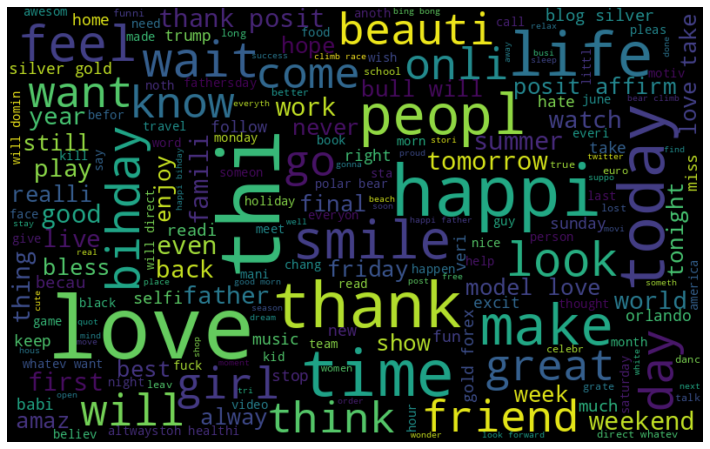

In [89]:
#Exploratory data Analysis

#Visualize the Frequently used words looks like a art

all_words =" ".join([sentence for sentence in data['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height =500, random_state=43,max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

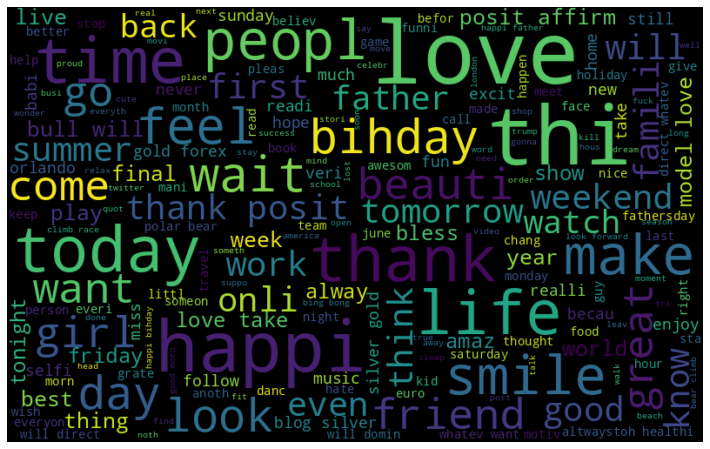

In [90]:
#frequently words visualization for positive words

all_words = " ".join([sentence for sentence in data['clean_tweet'][data['label']==0]])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

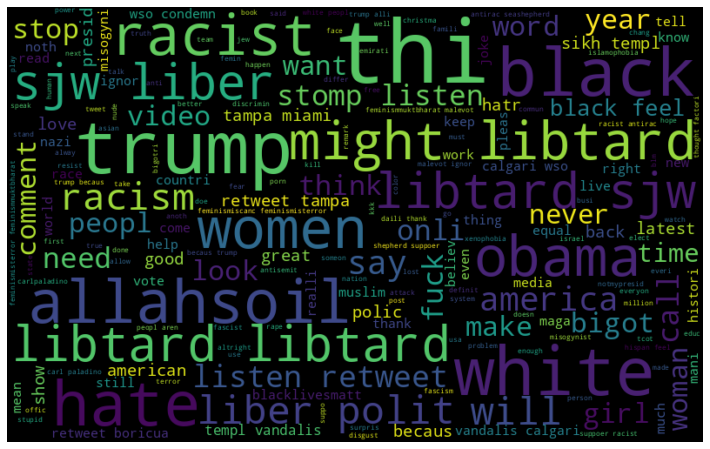

In [91]:
#visualize the frequency of negative words
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['label']==1]])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
#Extract the hastag  fun

def hashtag_extract(tweets):
  hastags =[]
  for tweet in tweets:
    ht =re.findall(r"#(\w+)",tweet)#
    hastags.append(ht)
  return hastags


In [123]:
#extract hashtag from non-racist/sexist tweets
ht_positive = hashtag_extract(data['clean_tweet'][data['label']==0])

In [124]:
#extract hashtag from racist/sexist tweets
ht_negative = hashtag_extract(data['clean_tweet'][data['label']==1])

In [120]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [125]:
#un nested  the ht_positive and ht_negative data
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])


In [126]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

['when', 'father', 'dysfunct', 'selfish', 'drag']

In [127]:
#frequency of the hashtags 
freq = nltk.FreqDist(ht_positive)
positive_hash = pd.DataFrame({'Hashtag':list(freq.keys()),'Count':list(freq.values())})

In [128]:
positive_hash.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


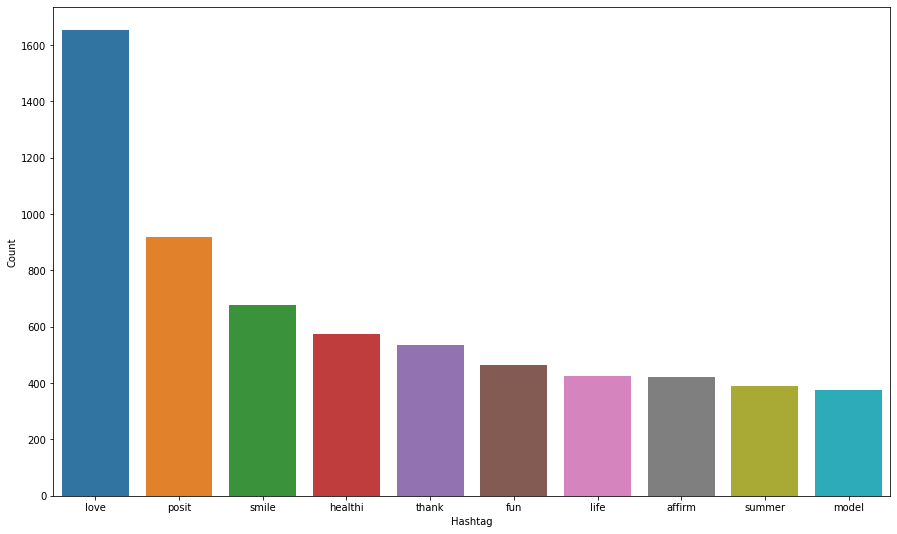

In [143]:
#select top 10 hashtags
positive_hash = positive_hash.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=positive_hash, x='Hashtag', y='Count')
plt.show()

In [138]:
#frequency of the hashtags
freq = nltk.FreqDist(ht_negative)
negative_hash = pd.DataFrame({'Hashtag':list(freq.keys()),'Count':list(freq.values())})

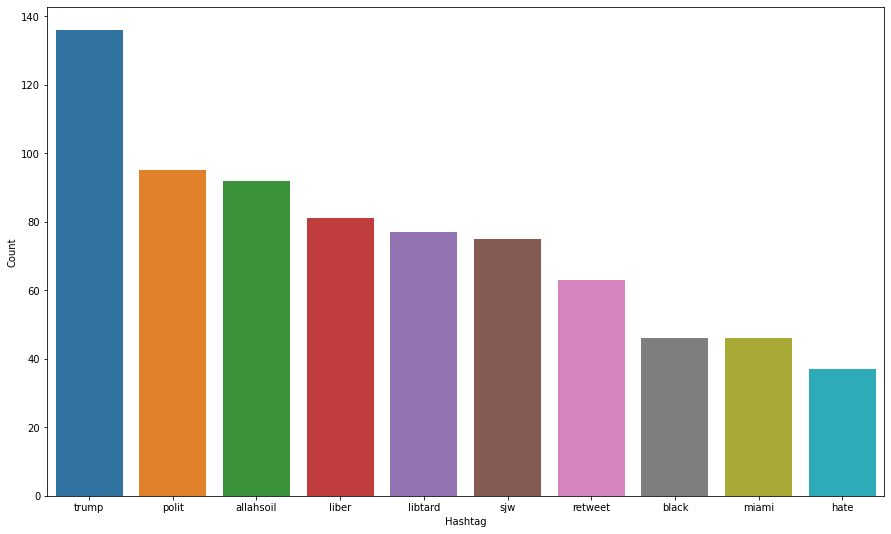

In [139]:
#select top 10 hashtags
negative_hash = negative_hash.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=negative_hash, x='Hashtag', y='Count')
plt.show()